In [39]:
from torchvision import transforms
from torchvision.datasets import MNIST
import os
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.utils.data.dataloader import DataLoader
from torchvision.transforms import ToTensor
import seaborn as sns
import pandas as pd

In [33]:
data_dir = os.path.dirname(os.getcwd().replace('\\',
                                               '/')) + '/datasets/downloaded'
dataset = MNIST(data_dir,
                 train=True,
                 download=True,
                 transform=transforms.Compose([ToTensor()]))
test_dataset = MNIST(data_dir,
                      train=False,
                      download=True,
                      transform=transforms.Compose([ToTensor()]))

In [36]:
len(dataset), len(test_dataset)

(60000, 10000)

In [37]:
labels = []
for _,j in dataset:
    labels.append(j)

In [40]:
counts = np.bincount(labels)
values = np.arange(0,10)
df = pd.DataFrame({'label':values, 'count': counts })
df.sort_values('count',ascending=False,inplace=True)

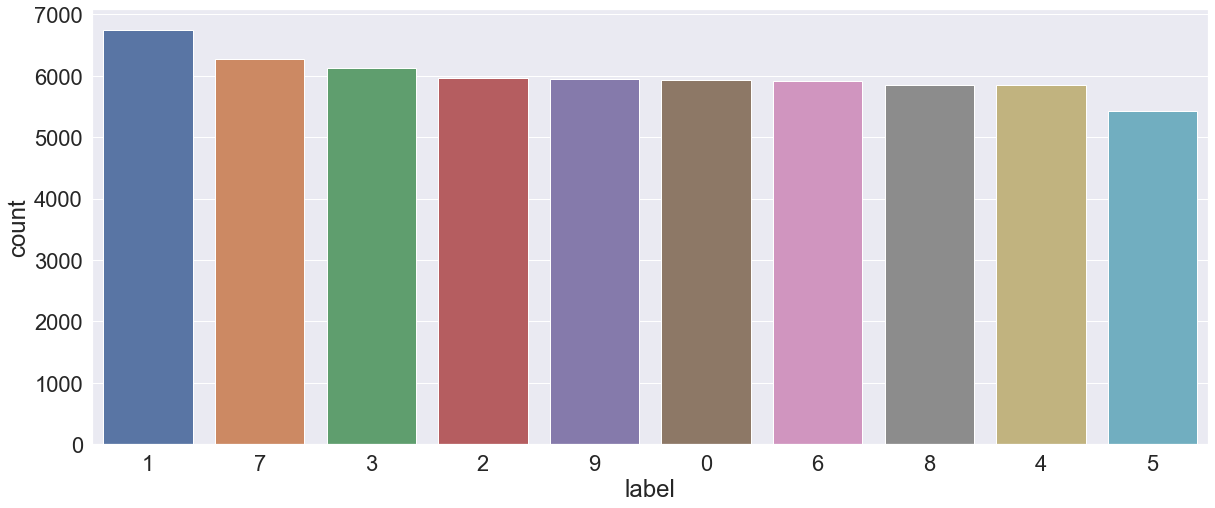

In [41]:
sns.set(font_scale = 2)
fig, ax = plt.subplots(figsize=(20, 8))
g = sns.barplot(x='label', y='count',data = df, ax = ax,order = df.label);

In [34]:
uniques = []
values = []
for i,j  in dataset:
    if(len(uniques) == 10):
        break
    if j not in values:
        uniques.append({'img': i, 'label':j})
        values.append(j)

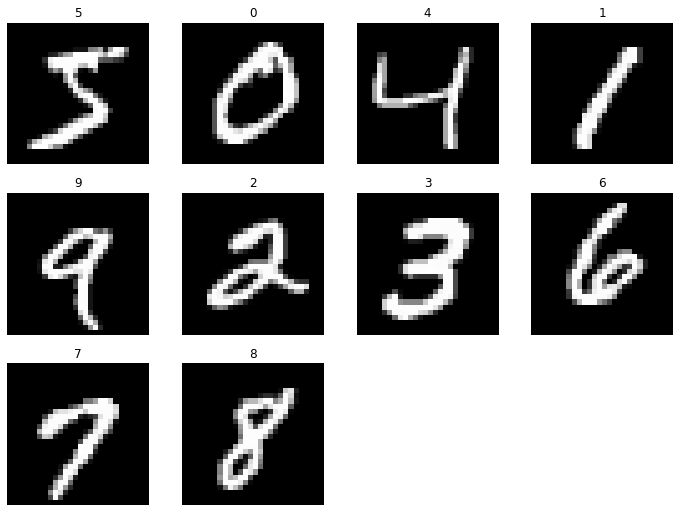

In [35]:
fig = plt.figure(figsize=(12, 12))
for idx,i in enumerate(uniques):
    ax = fig.add_subplot(4, 4, idx + 1)
    image = i['img']
    label = i['label']
    ax.imshow(image.reshape(28, 28), cmap='gray')
    ax.set_title(label)
    ax.axis('off')